# สร้างโมเดล Linear Regression สำหรับการคาดเดาหวยงวดถัดไป

### ติดตั้ง Package ที่ยังไม่มีใน Notebook Jupytor

In [186]:
!pip install matplotlib 
!pip install scikit-learn

## 0.นำเข้า Package ที่เกี่ยวข้อง

In [187]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## 1.ให้ทำการโหลดข้อมูลจากลิงค์
[โหลดข้อมูลจากลิงค์นี้](https://drive.google.com/file/d/1qpXVeS2oEf-DW_jFTusoNwkUJIM2x3ME/view)


## 2.นำเข้าข้อมูลจากไฟล์


In [188]:
dataset = pd.read_csv("lottery.csv")

ตรวจสอบ Header และ 5 บันทัดแรกของ Data

In [189]:
dataset.head()

,Last_Three_Digits,Date,Month,Years,First_Price,Last_Two_Digits_Upper,Three_Digits_Upper,Last_Two_Digits_Under,Datetime,day_of_week,weekday_name
0,559 626 098 654,16,11,2567,187221,21,221,38,2024-11-16,5,เสาร์
1,036 923 547 980,1,11,2567,536044,44,44,32,2024-11-01,4,ศุกร์
2,174 225 063 231,16,10,2567,482962,62,962,0,2024-10-16,2,พุธ
3,561 648 493 919,1,10,2567,718665,65,665,59,2024-10-01,1,อังคาร
4,053 812 079 566,16,9,2567,608662,62,662,37,2024-09-16,0,จันทร์


## 3.Data Preprocessing - การเตรียมข้อมูล

เลือกเฉพาะ Feature ที่เราคิดว่าสำคัญ ซึ่งจะเลือกเป็น
1. Date
2. Months
3. Years

ส่วน Output ที่เราต้องการจะให้เป็น **First_price** หรือก็คือ **รางวัลที่ 1**


### Droping Column ทิ้งหลักที่ไม่สนใจ เพื่อเก็บ Feature

In [190]:
feature_dataset = dataset[["Date", "Month", "Years"]]

In [191]:
feature_dataset.head()

,Date,Month,Years
0,16,11,2567
1,1,11,2567
2,16,10,2567
3,1,10,2567
4,16,9,2567


In [192]:
# Cleaning Data
feature_dataset = feature_dataset.dropna() # ลบค่า NaN
feature_dataset = feature_dataset.drop_duplicates() # ลบค่าที่ซ้ำกัน

### Get Output - เลือก Output ที่อยากทำนาย

In [193]:
expect_output = dataset[["First_Price"]]

In [194]:
expect_output = expect_output.dropna() # ลบค่า NaN
expect_output = expect_output.drop_duplicates() # ลบค่าที่ซ้ำกัน

## 4.แยกข้อมูลเป็น Train/Test

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_dataset, expect_output, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(652, 3)
(163, 3)


## 5.Data Transformations - แปลงค่า Row ให้เป็น Array Float32

In [196]:
train_feature_dataset_array = X_train.to_numpy().astype("float32")
train_expect_output_array = y_train.to_numpy().astype("float32")

test_feature_dataset_array = X_test.to_numpy().astype("float32")
test_expect_output_array = y_test.to_numpy().astype("float32")


## 6.Data Improvements (Optional - ไม่บังคับ แต่ควรทำ)

In [197]:
!pip install scikit-learn

### Create Normalizer

In [198]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
feature_scaler = MinMaxScaler((0, 1))
output_scaler = MinMaxScaler((0, 1))

### Normalize Data

In [199]:
scaled_feature_array = feature_scaler.fit_transform(train_feature_dataset_array)
scaled_output_array = output_scaler.fit_transform(train_expect_output_array)

In [200]:
scaled_feature_array

array([[0.        , 0.8181819 , 0.1764679 ],
       [0.51724136, 0.09090909, 0.47058868],
       [0.51724136, 0.8181819 , 0.58823395],
       ...,
       [0.        , 0.5454545 , 0.6764679 ],
       [0.51724136, 0.6363636 , 0.47058868],
       [0.51724136, 0.6363636 , 0.88235474]], dtype=float32)

## 7.Create Model

### Set Random


In [201]:
tf.random.set_seed(42)

### Check Shape

In [202]:
scaled_feature_array.shape[1],

(3,)

### Create Nueral Network Blueprints - ร่างโครงสร้างโมเดล

In [203]:
input_layer = tf.keras.layers.Input(shape=(scaled_feature_array.shape[1],))
hidden_layer_1 = tf.keras.layers.Dense(128, activation="relu")(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(16, activation="relu")(hidden_layer_1)
output_layer = tf.keras.layers.Dense(1, activation="linear")(hidden_layer_2)
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)


### Build Model - ประกอบโมเดล

In [204]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])



#### สรุปโครงสรา้งโมเดล

In [205]:
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,593 (10.13 KB)

 Trainable params: 2,593 (10.13 KB)

 Non-trainable params: 0 (0.00 B)

## 8.Training


In [206]:
history = model.fit(scaled_feature_array, scaled_output_array, epochs=500, batch_size=32, validation_split=0.2)


Epoch 1/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0488 - mae: 0.1215 - val_loss: 0.0254 - val_mae: 0.0861
Epoch 2/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0385 - mae: 0.1139 - val_loss: 0.0217 - val_mae: 0.0942
Epoch 3/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0339 - mae: 0.1164 - val_loss: 0.0204 - val_mae: 0.0929
Epoch 4/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0314 - mae: 0.1139 - val_loss: 0.0186 - val_mae: 0.0880
Epoch 5/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0288 - mae: 0.1089 - val_loss: 0.0173 - val_mae: 0.0830
Epoch 6/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0268 - mae: 0.1028 - val_loss: 0.0161 - val_mae: 0.0787
Epoch 7/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0247 - mae: 0.0979 - val_loss: 0.0154 - val_mae: 0.0747
Epoch 8/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0231 - mae: 0.0927 - val_loss: 0.0147 - val_mae: 0.0722
Epoch 9/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.021

## 9.Plotting Traing Result


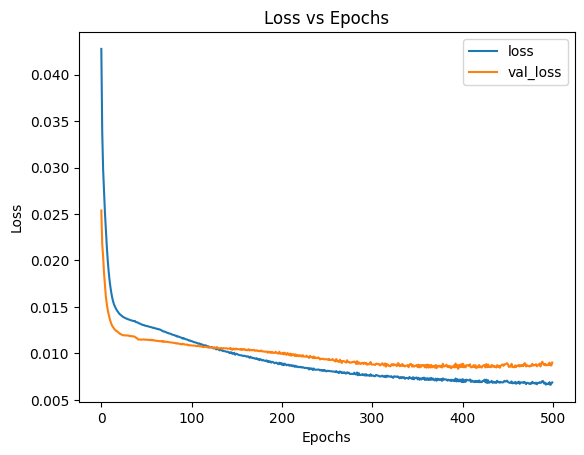

In [207]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 10.Evaluate Test Set - ทดสอบผลด้วยข้อมูลที่เราตัดออกไป

In [208]:
# Step 1: Scale the test features before prediction // แปลงข้อมูลทดสอบให้เป็นมาตรฐานเดียวกันกับข้อมูลที่ใช้ในการฝึก
scaled_test_features = feature_scaler.transform(test_feature_dataset_array)

# Step 2: Make predictions on the scaled test data // ทำนายผลจากข้อมูลทดสอบที่ได้แปลงแล้ว
scaled_predictions = model.predict(scaled_test_features)

# Step 3: Inverse transform to get the actual numbers // แปลงค่าที่ทำนายกลับไปยังมาตรฐานเดิม
result = output_scaler.inverse_transform(scaled_predictions).astype("int")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [213]:
print(result.shape)
print(test_expect_output_array.shape)

(163, 1)
(163, 1)


## 11.Insert Result To Dataframe

In [210]:
result_data_dict = {
    "result": result.flatten(),
    "expect_output": test_expect_output_array.flatten()
}
result_data = pd.DataFrame(result_data_dict)
result_data.head()

,result,expect_output
0,674764,272932.0
1,463451,583470.0
2,554274,850348.0
3,477717,506260.0
4,532731,750792.0


## 12.Plotting the results


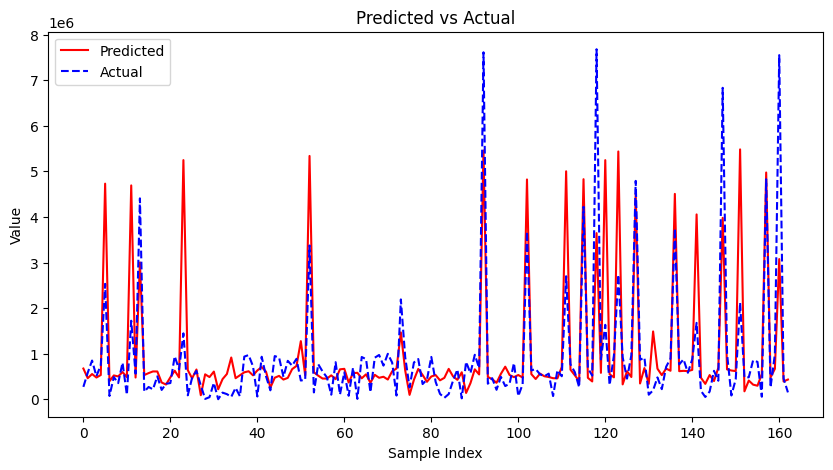

In [211]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(result_data["result"], label="Predicted", color="red", linestyle="-")
plt.plot(result_data["expect_output"], label="Actual", color="blue" , linestyle="--")
plt.title("Predicted vs Actual")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.show()


## 13.Save Model

In [212]:
model.save("lottery_model.h5")
model.save("lottery_model.keras")